1. Image thresholding

Lab Task 01 : Write a function to perform image thresholding using point processing taking the image file and the threshold value from the user.

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def show_2_images(image1, image2, title1, title2):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(image1, cmap='gray')
    ax[0].set_title(title1)

    ax[1].imshow( image2, cmap='gray')
    ax[1].set_title(title2)

    plt.show()

def show_3_images(image1, image2, image3, title1, title2, title3):
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(image1, cmap='gray')
    ax[0].set_title(title1)

    ax[1].imshow( image2, cmap='gray')
    ax[1].set_title(title2)

    ax[2].imshow( image3, cmap='gray')
    ax[2].set_title(title3)

    plt.show()

In [39]:
# Function to to perform image thresholding using point processing
def image_thresholding(image_path, threshold_value):
    # Read the image in grayscale mode
    image = cv2.imread(image_path, 0)

    # Apply thresholding
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    return thresholded_image

In [40]:
# Loading the original image
img = plt.imread('image.jpg')

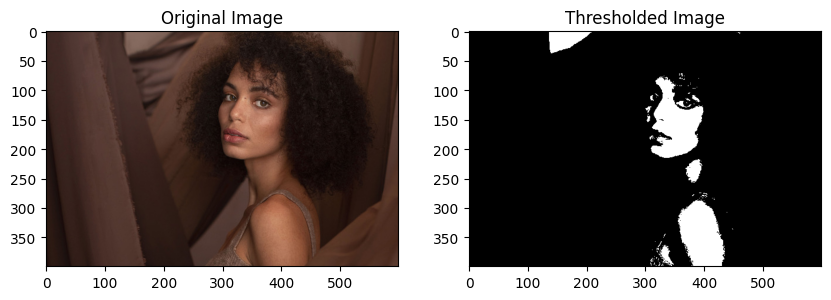

In [41]:
thresh_img = image_thresholding("image.jpg", 100)
show_2_images(img,thresh_img,'Original Image', 'Thresholded Image')

2. Image arithmetic operations

Lab Task 02 : Read two images and perform addition and subtraction.

In [42]:
def image_addition(image1, image2):
    # Ensure both images have the same dimensions
    image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Perform addition using OpenCV function
    add_image = cv2.add(image1, image2_resized)

    return add_image

In [43]:
img1 = plt.imread('image2.jpg')
img2 = plt.imread('image.jpg')

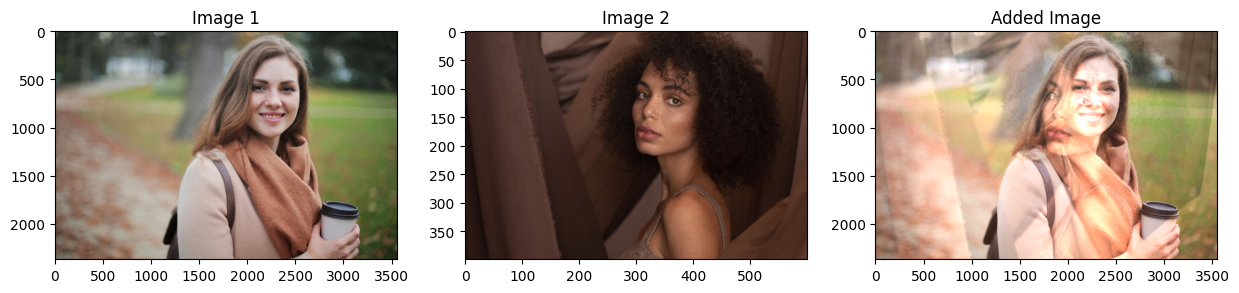

In [44]:
add_img = image_addition(img1,img2)
show_3_images(img1,img2,add_img,'Image 1', 'Image 2','Added Image')

In [45]:
def image_subtraction(image1, image2):
    # Ensure both images have the same dimensions
    image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Perform addition using OpenCV function
    sub_image = cv2.subtract(image1, image2_resized)

    return sub_image

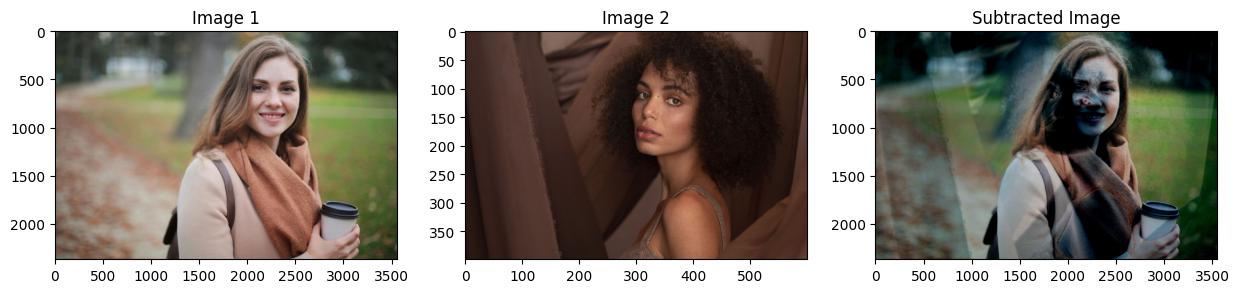

In [46]:
sub_img = image_subtraction(img1,img2)
show_3_images(img1,img2,sub_img,'Image 1', 'Image 2','Subtracted Image')

3. Spatial Processing

Lab Task 03 :
1. Write simple programs to demonstrate the following. Show the original and resultant images in the same figure to compare them easily.

    a. Log transformation

    b. Power transformation

    c. Contrast Stretching

    d. Gray level slicing

    e. Bit plane slicing
    

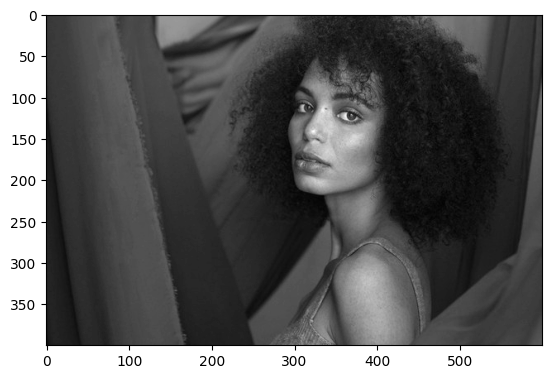

In [47]:
# will use the gray scale image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

a. Log transformation

In [48]:
# Log transformation function
def log_transform(image):
    # Apply log transformation
    c = 255/(np.log(1 + np.max(img))) 
    log_transformed = c * np.log(1 + img) 
  
    # Specify the data type. 
    log_transformed = np.array(log_transformed, dtype = np.uint8) 

    return log_transformed

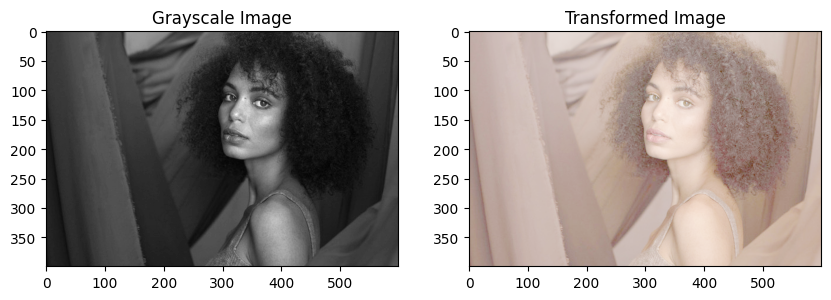

In [49]:
log_trans_img = log_transform(gray_img)
show_2_images(gray_img,log_trans_img,'Grayscale Image', 'Transformed Image')

b. Power transformation

In [50]:
# Power transformation function
def power_transform(image, gamma=1.0):
    # Apply power transformation
    transformed_image = np.uint8(255 * (image / 255) ** gamma)

    return transformed_image

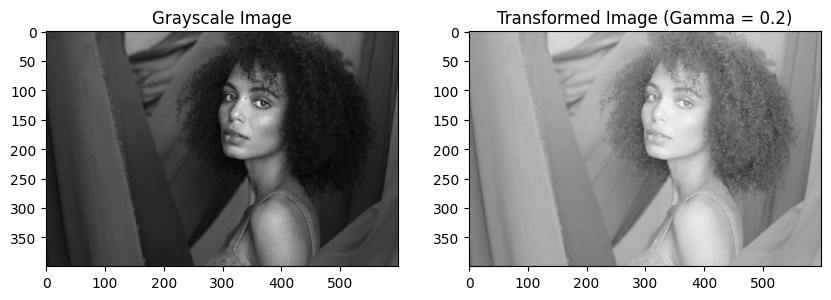

In [51]:
pow_trans_img = power_transform(gray_img,0.2)
show_2_images(gray_img,pow_trans_img,'Grayscale Image', 'Transformed Image (Gamma = 0.2)')

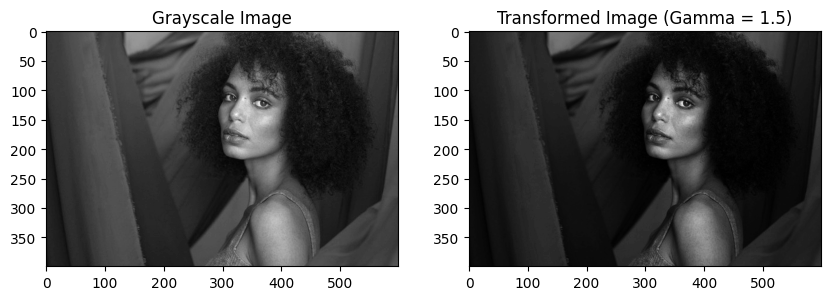

In [52]:
pow_trans_img = power_transform(gray_img,1.5)
show_2_images(gray_img,pow_trans_img,'Grayscale Image', 'Transformed Image (Gamma = 1.5)')

c. Contrast Stretching

In [53]:
# Contrast Stretching function
def piecewise_linear_transform(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2  
  
# Vectorize the function to apply it to each value in the Numpy array. 
contrast_stretching = np.vectorize(piecewise_linear_transform) 


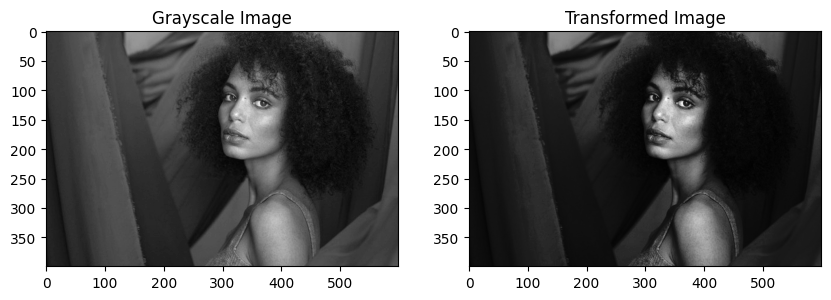

In [54]:
contrast_stretched_img = contrast_stretching(gray_img, 50,30,170,255)
show_2_images(gray_img,contrast_stretched_img,'Grayscale Image', 'Transformed Image')

d. Gray level slicing

In [55]:
# Gray level slicing function
def gray_level_slicing(image, min_intensity, max_intensity):
    row, column= image.shape

    #  Create an zeros array to store the sliced image
    sliced_image = np.zeros((row,column),dtype = 'uint8')

    #  Specify the min and max range
    min_range = min_intensity
    max_range = max_intensity

    # Loop over the input image and if pixel value lies in desired range set it to 255 
    # otherwise set it to desired value
    for i in range(row):
        for j in range(column):
            if gray_img[i,j]>min_range and gray_img[i,j]<max_range: 
                sliced_image[i,j] = 255
            else: 
                sliced_image[i,j] = gray_img[i-1,j-1] 

    return sliced_image

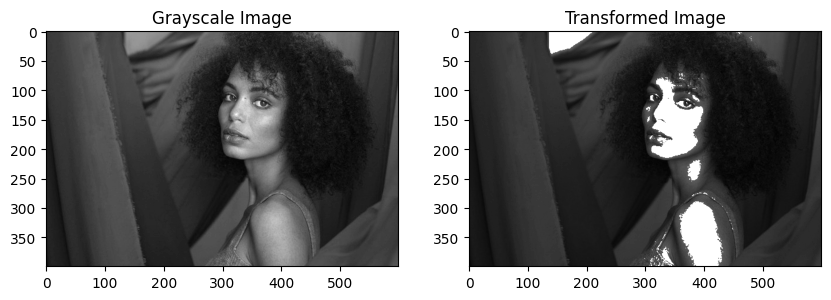

In [56]:
gray_sliced_img = gray_level_slicing(gray_img, 90, 220)
show_2_images(gray_img,gray_sliced_img,'Grayscale Image', 'Transformed Image')

e. Bit plane slicing

In [57]:
def bit_plane_slicing(image):
    # Initialize list to store bit planes
    bit_planes = []

    # Iterate over each bit plane from 0 to 7
    for bit in range(8):
        # Apply bit plane slicing
        bit_plane = (image >> bit) & 1

        # Convert the bit plane to 8-bit unsigned integer
        bit_plane = np.uint8(bit_plane * 255)

        # Append the bit plane to the list
        bit_planes.append(bit_plane)

    return bit_planes

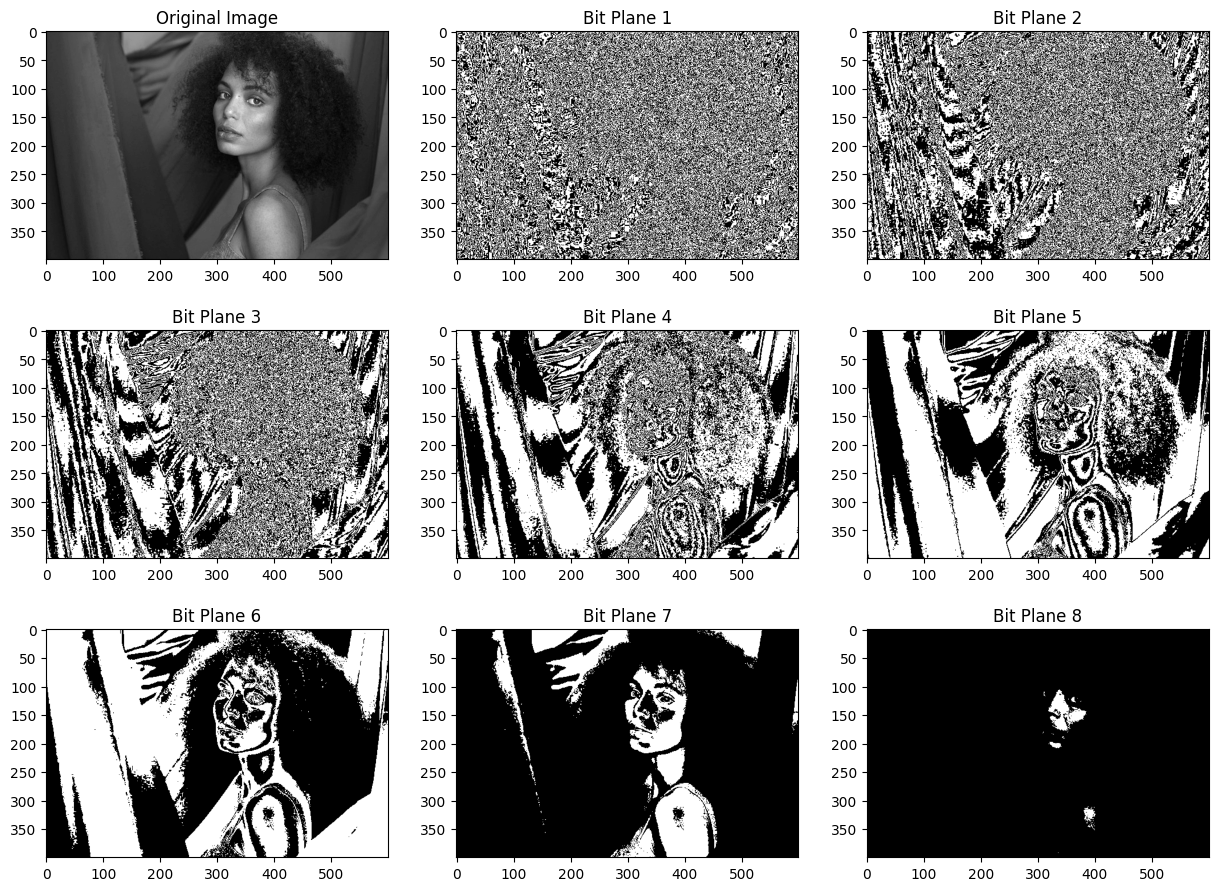

In [58]:
bit_sliced_imgs = bit_plane_slicing(gray_img)

fig, ax = plt.subplots(3, 3, figsize=(15, 11))

ax[0, 0].imshow(gray_img, cmap='gray')
ax[0, 0].set_title('Original Image')

ax[0, 1].imshow(bit_sliced_imgs[0], cmap='gray')
ax[0, 1].set_title('Bit Plane 1')

ax[0, 2].imshow(bit_sliced_imgs[1], cmap='gray')
ax[0, 2].set_title('Bit Plane 2')

ax[1, 0].imshow(bit_sliced_imgs[2], cmap='gray')
ax[1, 0].set_title('Bit Plane 3')

ax[1, 1].imshow(bit_sliced_imgs[3], cmap='gray')
ax[1, 1].set_title('Bit Plane 4')

ax[1, 2].imshow(bit_sliced_imgs[4], cmap='gray')
ax[1, 2].set_title('Bit Plane 5')

ax[2, 0].imshow(bit_sliced_imgs[5], cmap='gray')
ax[2, 0].set_title('Bit Plane 6')

ax[2, 1].imshow(bit_sliced_imgs[6], cmap='gray')
ax[2, 1].set_title('Bit Plane 7')

ax[2, 2].imshow(bit_sliced_imgs[7], cmap='gray')
ax[2, 2].set_title('Bit Plane 8')

plt.show()


2. Consider the graph for a typical transformation function used for Contrast Stretching in the given figure and determine the behavior of the function with respect to given changes.

    a. When r1 =s1 and r2=s2
    
    b. When r1=r2, s1=0 and s2=L-1

a. When r1 =s1 and r2=s2

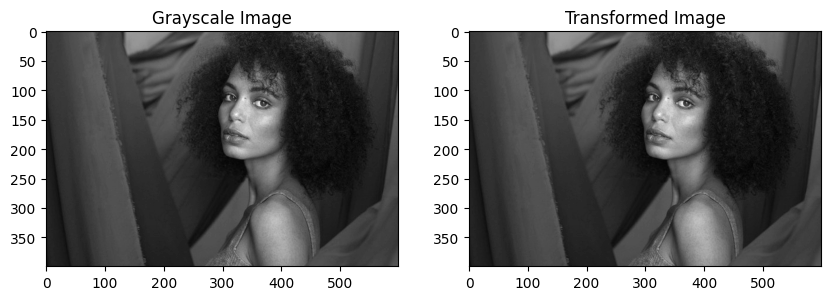

In [59]:
r1 = 40
s1 = 40
r2 = 120
s2 = 120

contrast_stretched_img = contrast_stretching(gray_img, r1, s1, r2, s2)
show_2_images(gray_img,contrast_stretched_img,'Grayscale Image', 'Transformed Image')

 When r1=s1 and r2=s2, the points (r1, s1) and (r2, s2) lie on the line s = r, which is the identity line. This means that the output value s is equal to the input value r for all r, and thus the transformation function T® does not change the image contrast.

b. When r1=r2, s1=0 and s2=L-1

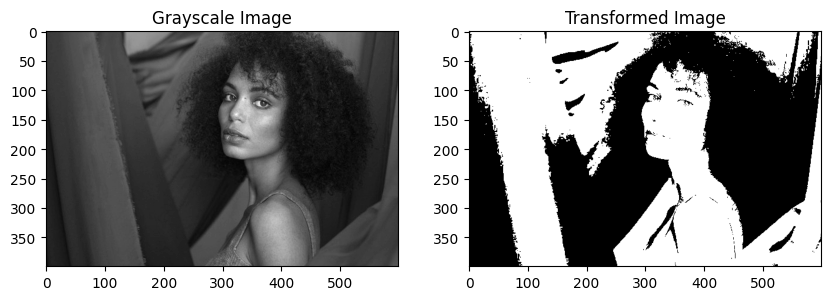

In [60]:
r1 = 40
s1 = 0
r2 = 40
s2 = 255

contrast_stretched_img = contrast_stretching(gray_img, r1, s1, r2, s2)
show_2_images(gray_img,contrast_stretched_img,'Grayscale Image', 'Transformed Image')

When r1=r2, the transformation function T® becomes a binary function. For all values of r less than r1, the output s is 0, and for all values of r greater than r1, the output s is L-1. This creates a high-contrast image where all pixel values below a certain threshold are set to 0 (black) and all pixel values above the threshold are set to L-1 (white).

4. Masking

Lab Task 04 : Write a program to read any image, resize it to 256x256. Apply the masks shown in following figures so that only the middle part of the image is visible.

In [61]:
def apply_mask(image, margin, output_size=256):

    # Resize the image to the specified output size
    image_resized = cv2.resize(image, (output_size, output_size))

    # Create a mask to keep only the middle part of the image visible
    mask = np.zeros_like(image_resized)
    center = output_size // 2
    mask[margin: 255 - margin, margin: 255 - margin] = 255

    # Apply the mask to the resized image
    masked_image = cv2.bitwise_and(image_resized, mask)

    return masked_image

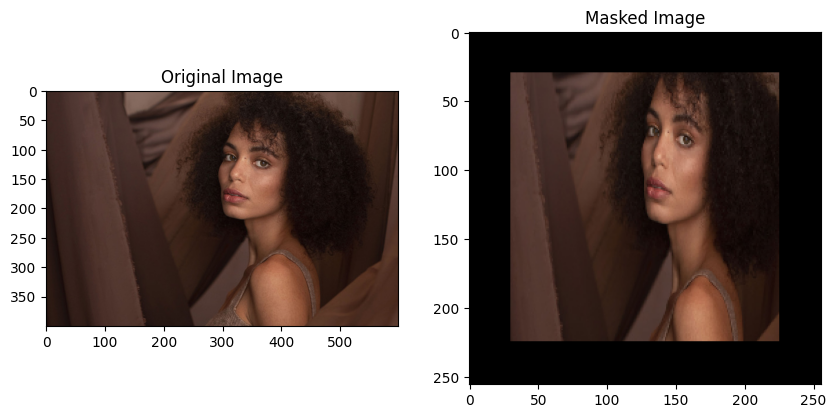

In [62]:
img = plt.imread('image.jpg')

masked_image = apply_mask(img, 30, 256)
show_2_images(img,masked_image,'Original Image', 'Masked Image')

In [63]:
def apply_circular_mask(image, margin, output_size=256):
    # Resize the image to the specified output size
    image_resized = cv2.resize(image, (output_size, output_size))

    # Create a circular mask to keep only the middle part of the image visible
    mask = np.zeros_like(image_resized)
    center = output_size // 2
    radius = output_size // 2
    cv2.circle(mask, (center, center), radius - margin, (255, 255, 255), -1, cv2.LINE_AA)

    # Apply the mask to the resized image
    masked_image = cv2.bitwise_and(image_resized, mask)

    return masked_image

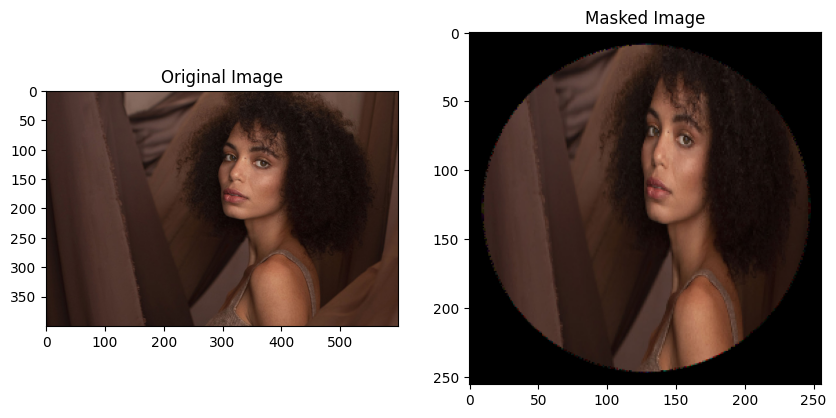

In [64]:
masked_image = apply_circular_mask(img, 10, 256)
show_2_images(img,masked_image,'Original Image', 'Masked Image')

5. Brightness

Lab Task 05 : Write your own Python OpenCV function addbrightness() and use it to increase brightness of a given image.(Hint: Use Image arithmetic operations)

In [65]:
def add_brightness(image, brightness):
    # Add brightness to the image
    brightened_image = cv2.add(image, brightness)

    return brightened_image

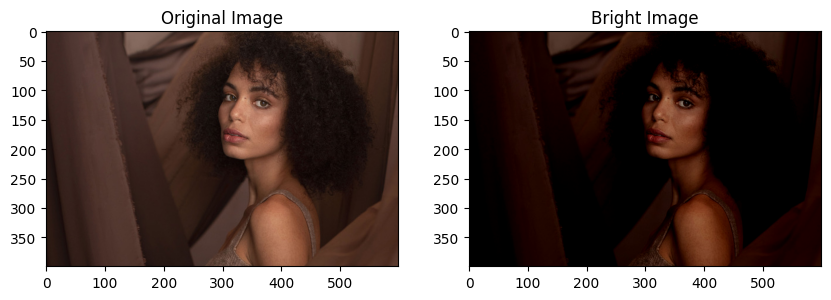

In [68]:
bright_img = add_brightness(img, -50)
show_2_images(img,bright_img,'Original Image', 'Low Brightness')

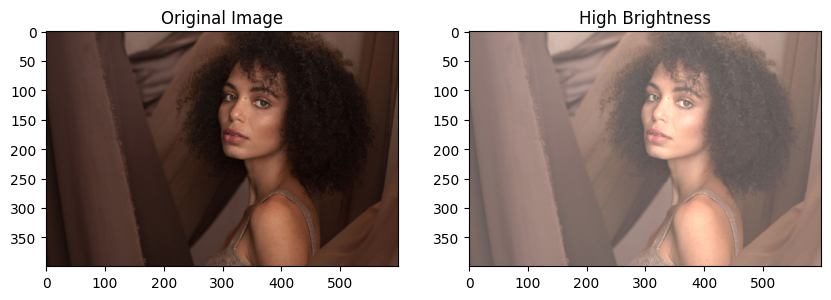

In [70]:
bright_img = add_brightness(img, 80)
show_2_images(img,bright_img,'Original Image', 'High Brightness')

6. Histogram Processing

a. Histogram Calculation in OpenCV
Use inbuilt OpenCV cv2.calcHist() function to display the histogram of a given image.

In [117]:
from io import BytesIO

def display_cv2_histogram(image):
    # find frequency of pixels in range 0-255 
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
    
    plt.hist(image.ravel(),256,[0,256])
    plt.title('Histogram (OpenCV)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()


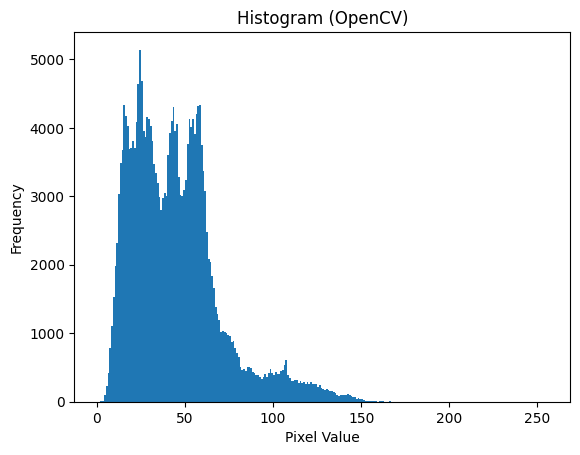

In [118]:
display_cv2_histogram(gray_img)

b. Histogram Calculation in Numpy
Use inbuilt numpy np.histogram() function to display the histogram of a given image.

In [145]:
def display_numpy_histogram(image):    
    # Calculate histogram
    hist,bins = np.histogram(image,256,[0,256])
    
    # Plot histogram
    plt.hist(image.ravel(),256,[0,256])
    plt.title('Histogram (Numpy)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()


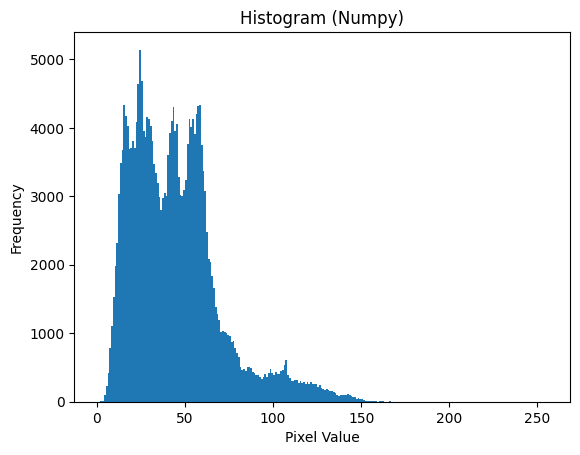

In [146]:
display_numpy_histogram(gray_img)

C. Then write your own histogram functions for the following scenarios

    i. Show a histogram plot for a grayscale image.
    
    ii. Show three histograms for a given RGB image.

In [121]:
def grayscale_histogram(image):
    # Calculate histogram
    # hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Plot histogram
    plt.hist(image.ravel(),256,[0,256])
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

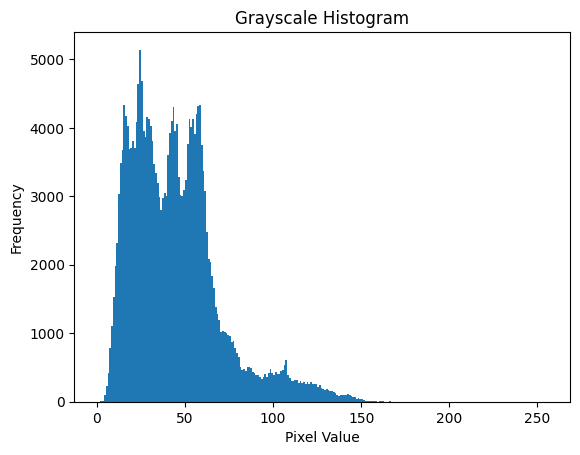

In [122]:
grayscale_histogram(gray_img)

In [143]:
def rgb_histogram(image):
    # Separate color channels
    red_channel = image[:,:,0]
    green_channel = image[:,:,1]
    blue_channel = image[:,:,2]
    
    # Plot histograms
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    # plt.plot(hist_red, color='red')
    plt.hist(red_channel.ravel(),256,[0,256], color='red')
    plt.title('Red Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.hist(green_channel.ravel(),256,[0,256], color='green')
    plt.title('Green Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(blue_channel.ravel(),256,[0,256], color='blue')
    plt.title('Blue Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

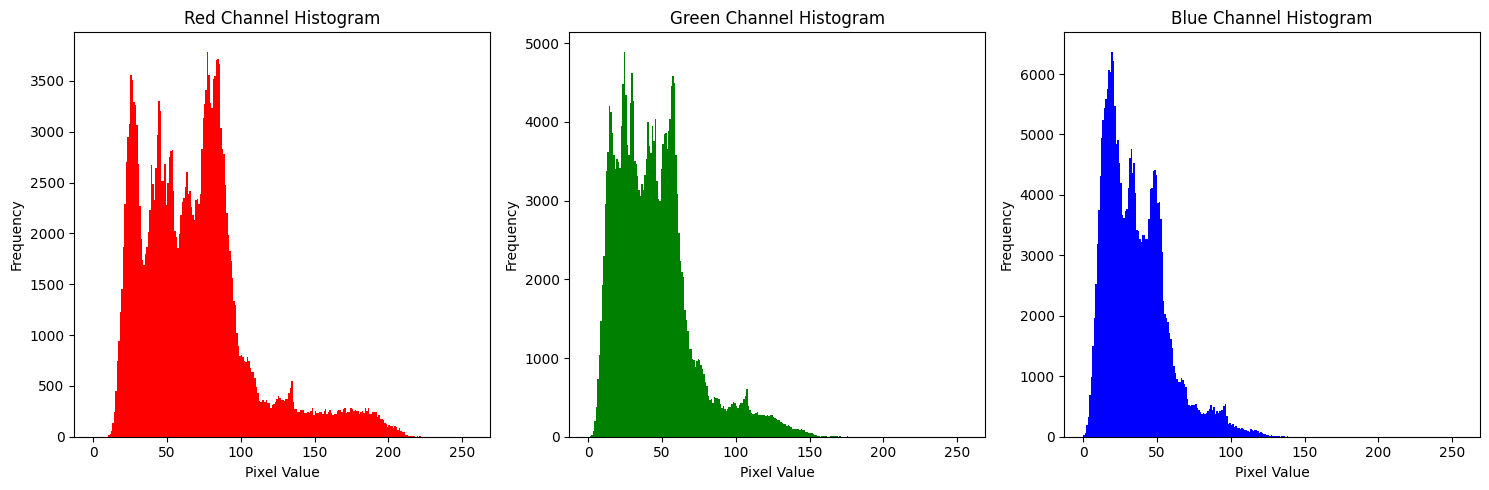

In [149]:
rgb_histogram(img)

d. Consider the four images given in the resources folder. Plot the histogram for each image. Perform Histogram Equalization on each image and plot the histograms of the resultant images. Comment on the results you have obtained.

In [188]:
def plot_histogram(image, title, main_title):
     # Calculate histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.suptitle(main_title)

    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(),256,[0,256], color='black')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()

In [167]:
# Loading the images
ref1 = plt.imread('bright.jpg')
ref2 = plt.imread('dark.jpg')
ref3 = plt.imread('high_contrast.jpg')
ref4 = plt.imread('low_contrast.jpg')

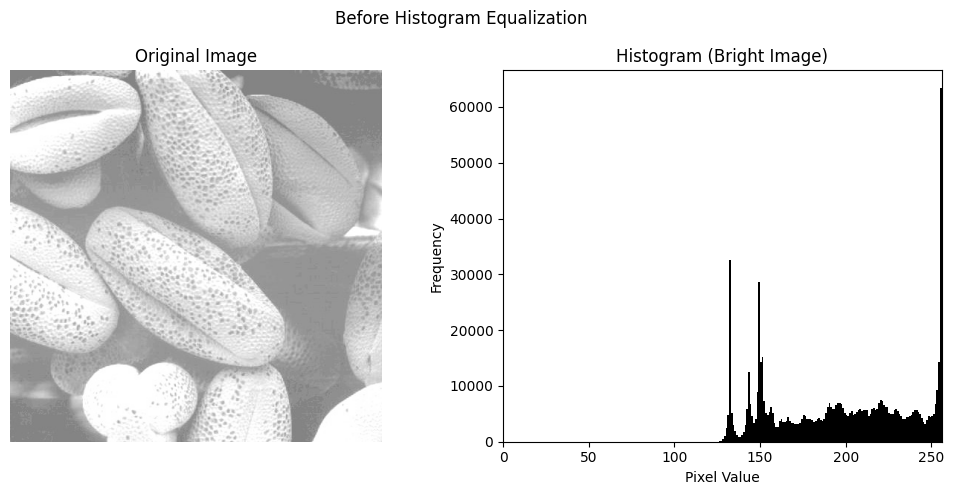

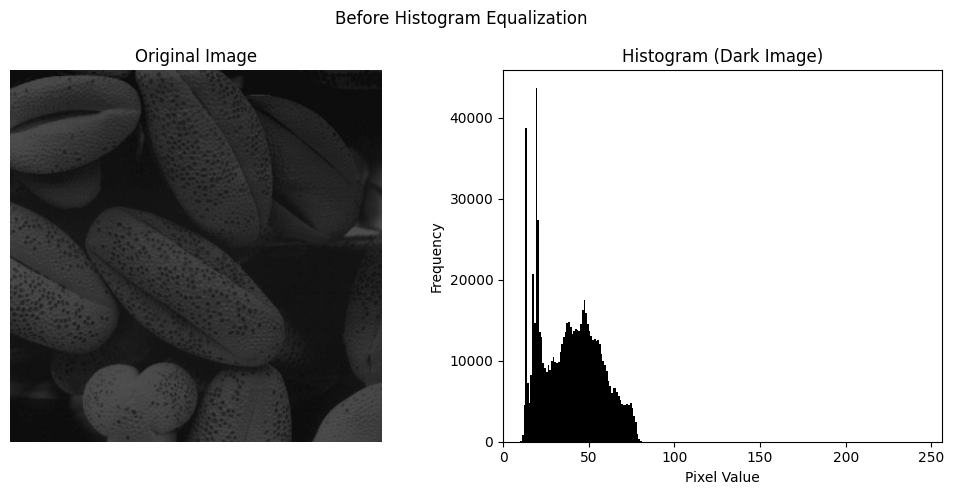

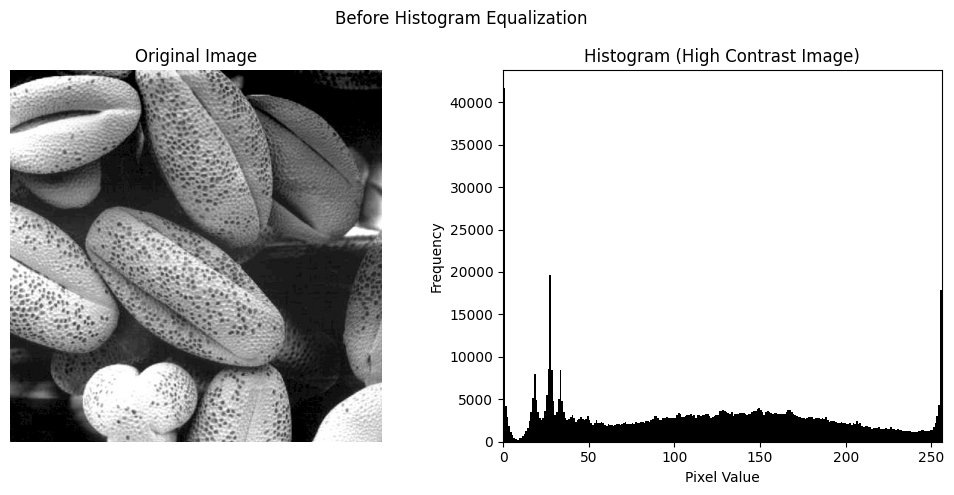

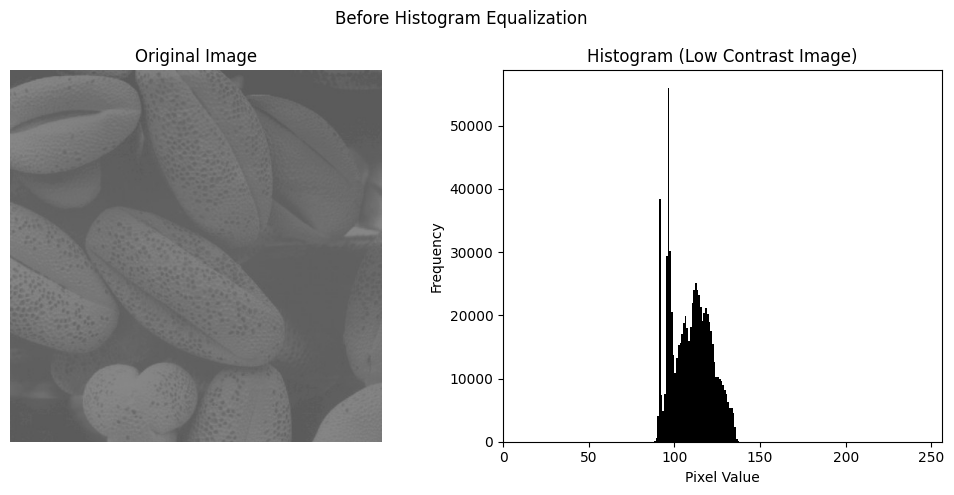

In [189]:
# Plotting image and their histogram before Histogram Equalization
plot_histogram(ref1, 'Histogram (Bright Image)', 'Before Histogram Equalization')
plot_histogram(ref2, 'Histogram (Dark Image)', 'Before Histogram Equalization')
plot_histogram(ref3, 'Histogram (High Contrast Image)', 'Before Histogram Equalization')
plot_histogram(ref4, 'Histogram (Low Contrast Image)', 'Before Histogram Equalization')


In [186]:
def histogram_equalization(image, title, main_title):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform histogram equalization
    equalized = cv2.equalizeHist(gray)
    
    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.suptitle(main_title)

    plt.imshow(equalized, cmap='gray')
    plt.title("Resultant Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.hist(equalized.ravel(),256,[0,256], color='black')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()

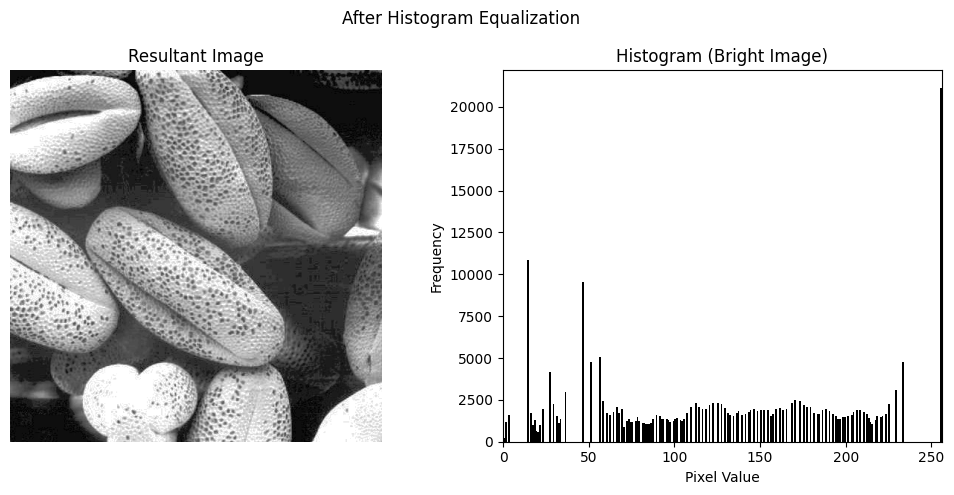

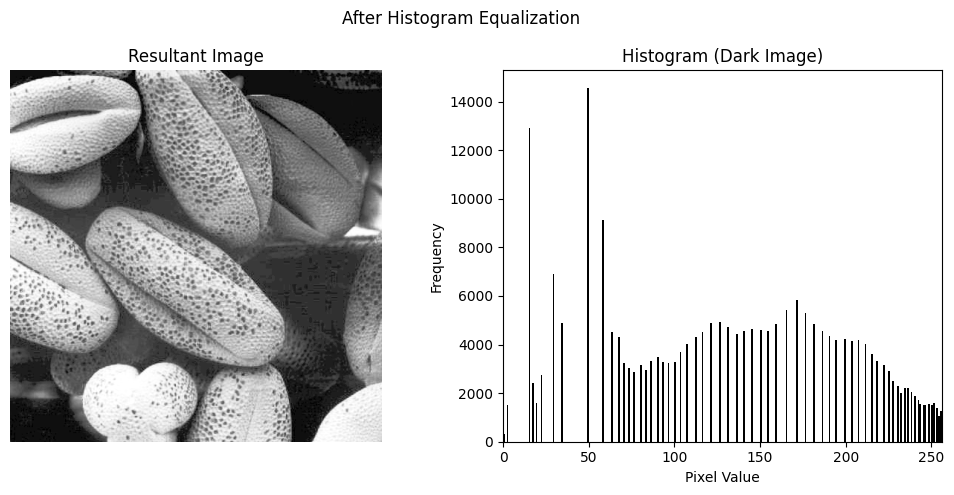

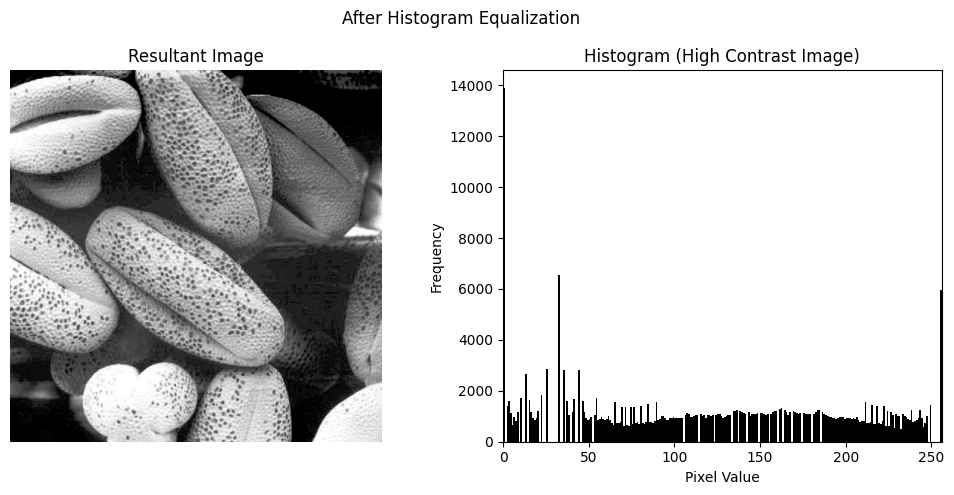

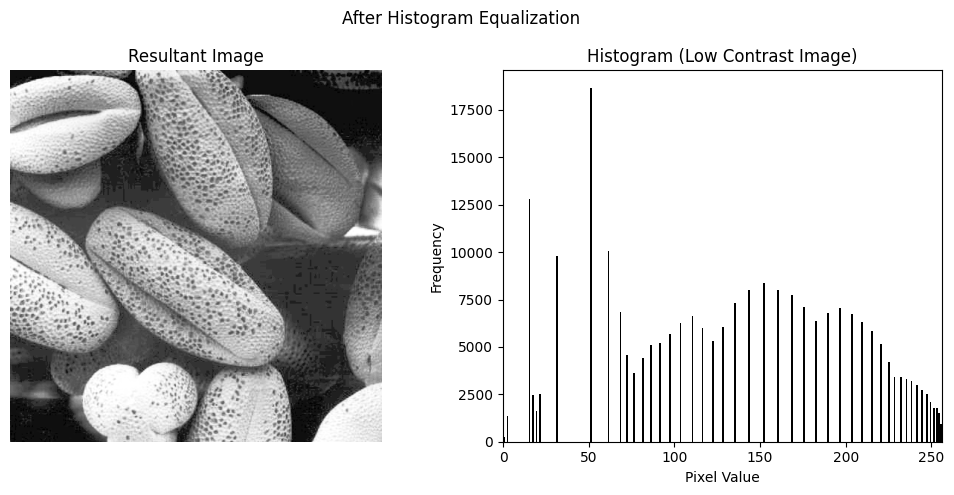

In [187]:
# Plotting image and their histogram after Histogram Equalization
histogram_equalization(ref1, 'Histogram (Bright Image)', 'After Histogram Equalization')
histogram_equalization(ref2, 'Histogram (Dark Image)', 'After Histogram Equalization')
histogram_equalization(ref3, 'Histogram (High Contrast Image)', 'After Histogram Equalization')
histogram_equalization(ref4, 'Histogram (Low Contrast Image)', 'After Histogram Equalization')

Histogram equalization enhances the contrast of images by spreading out the intensity values. The equalized images tend to have better contrast and detail compared to the original images, as seen in the histograms. However, sometimes histogram equalization can lead to unnatural-looking images, especially when there are already high contrasts in the original images. It's essential to evaluate the results based on the specific characteristics of each image.